

# Naive Bayes 

Course: ITCS 4156 - Introduction to Machine Learning 

Instructor: Xiang Zhang

$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\uv}{\mathbf{u}}
 \newcommand{\vv}{\mathbf{v}}
 \newcommand{\tv}{\mathbf{t}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Im}{\mathbf{I}}
 \newcommand{\Um}{\mathbf{U}}
 \newcommand{\Vm}{\mathbf{V}} 
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
 \newcommand{\Lambdav}{\boldsymbol\Lambda}
$

<br/>
<font color="blue"><b>

NAME: Hima Tulasi
   

</b> </font>

## Goal

The goal of this activity is to practice using the Gaussian Naive Bayes algorithm. To do so, we'll look at using the Iris dataset which is one of the most famous classical machine learning classification datasets.

Your job is to read through the lab and fill in any code segments that are marked by `TODO` headers and comments. **It should be noted, that all the correct outputs are given below each code cell. It might be useful to duplicate all the `TODO` cells so you can try to match the correct output with your own code!**

Use the `todo_check()`to help guide you in understanding whether your code for a given TODO is correct or incorrect. However, failing a TODO check doesn't mean you won't receive points, though it could be a good indication. If you are failing feel free to ask and we can help check what is happening.

## Agenda

- Review and load the Iris dataset via Sklearn
- Quickly re-visualize the Iris dataset
- Create the data preparation pipeline where we apply data preprocessing AFTER splitting
- Implement Gaussian Naive Bayes
- Investigate multi-class classification using different features

## Table of notation

| Symbol                     | Meaning                     | Symbol    | Meaning                                                          |
|----------------------------|-----------------------------|-----------|------------------------------------------------------------------|
| $\xv$ or $\vec{x}$         | feature/input vector        | $x_i$     | $i$th element of $\xv$                                           |
| $\Xm$                      | input matrix                | $x_{i,j}$ | $i$th row and $j$th column of $\Xm$                              |
| $\yv$ or $\tv$             | labels/targets              | $n$       | number of features or columns 
| $\wv$ or $\mathbf{\theta}$ | weight/parameter vector     | $m$       | number of data samples <br>(also used to refer to the slope) |samples or rows                                   |
| $f$ or $h$                 | hypothesis function <br> (i.e., a model)        | $\hat{\yv}$ <br> $f(\xv {;} \wv)$<br>$h(\xv {;} \wv)$ | predictions <br> y-hat |
| $E$              | error or sum of error (loss)  | $SSE$      | sum of squared error function                                            |
| $MSE$                      | mean squared error| $\nabla$  | gradient (nabla)                                       |
| $\partial$                 | partial derivative          | $\alpha$  | learning rate (alpha)                                  |       
| $J$ | general placeholder for <br>the objective function | $x^T$| transpose of a vector or matrix |
$b$ | bias or y-intercept term | $T$ | Threshold |
$*$| element-wise<br> multiplication | $\cdot$ | dot product|
| $z$<br>$\zv$| value before applying activation function |  $X, Y$ | Random variables |
| $K$| number/set of classes | $k$ | current class|
| $MAP$|  maximum a posteriori | $ML$ |  maximum likelihood|


## Imports 

In [1]:
import gc
from typing import Tuple, Union, List

# Debugger
from IPython.core.debugger import set_trace

import sklearn
sklearn_version = '1.0'
# Check to make sure you have the right version of sklearn
assert sklearn.__version__  > sklearn_version, f'sklearn version is only {sklearn.__version__} and needs to be > {sklearn_version}'

import numpy as np
np.set_printoptions(suppress=True)
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
# Set this to True if you DO NOT want to run the 
# garbage_collect() functions throughout the notebook
turn_off_garbage_collect = False

def garbage_collect(vars_):
    if not turn_off_garbage_collect:
        for v in vars_:
            if v in globals():
                del globals()[v]
        collected = gc.collect()

def todo_check(condi_err):
    failed_err = "You passed {}/{} and FAILED the following code checks:{}"
    failed = ""
    n_failed = 0
    for check, (condi, err) in enumerate(condi_err):
        if not condi:
            n_failed += 1
            failed += f"\nFailed check [{check+1}]:\n\t Tip: {err}"

    if len(failed) != 0:
        passed = len(condi_err) - n_failed
        err = failed_err.format(passed, len(condi_err), failed)
        raise AssertionError(err.format(failed))
    print("Your code PASSED the code check!")

# Problem statement summary and data loading

## Iris dataset problem summary

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmiro.medium.com%2Fmax%2F1400%2F0*_WfmSKzMX-u_xVyc.png&f=1&nofb=1">


The data we are going to be using for this lab is the famous iris dataset. This dataset is a frequently used dataset when first being introduced to classification in machine learning. [Kaggle's](https://www.kaggle.com/arshid/iris-flower-dataset)  description of the dataset is as follows:

> The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper. The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris dataset because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of 3 related species. The dataset consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). 4 features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

Thus, the goal of this data is a three-way multi-classification problem where we must classify each data sample either as an iris setosa, iris virginica or iris versicolor.

## Loading the data
Famous datasets like the Iris dataset can often be found within machine learning packages, meaning all you have to do is import the dataset via a given package. For instance, Scikit Learn (sklearn) already has the Iris dataset built into its library. All we need to do is simply import it! 

#### TODO 1
Complete the TODO by loading the Iris dataset using Sklearn.

1. Import the `load_iris()` function from `sklearn.datasets` ([docs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)).
2. Load the Iris dataset by calling the `load_iris()` function. Store the output into `iris`.

In [3]:
# TODO 1.1
#this line will import load_iris from sklearn.datasets
from sklearn.datasets import load_iris

# TODO 1.2
#loads the dataset
iris = load_iris()

todo_check([
    (type(iris) == sklearn.utils.Bunch, "'iris' is not of type Bunch")
])

Your code PASSED the code check!


Remember, the `iris` variable stores a class instance of Skleanr's e `sklearn.utils.Bunch` (see last module's lab).

Below, we can access the data, feature names, class targets/labels, and class names.

In [4]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

**Here we can see that label 0 corresponds to 'setosa', label 1 corresponds to 'versicolor', and label 2 corresponds to 'virginica' as the class labels in `iris.targets` correspond to the index of `iris.target_names`.** 


In [6]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Converting to a DataFrame

Before moving on, let's covert the iris data into a Pandas DataFrame so we can reuse the data cleaning and transformation classes we defined in prior labs.

In [8]:
# We have to reshape iris.target so that it is a 2D array
# such that it can be stacked with iris.data
data = np.hstack([iris.data, iris.target.reshape(-1,1)])

# Removes the (cm) from iris.feature_names 
cleaned_feature_names = [name.replace(' (cm)', '') for name in iris.feature_names]
feature_names = np.hstack([cleaned_feature_names, 'class'])

iris_df = pd.DataFrame(data, columns=feature_names)
display(iris_df)

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


# Visualization and exploration

## All features against each other

Now, let's plot all our features against one another and see if our classes are still linear separable. We can do so using Seaborn's `pairplot()` function. Recall, Seaborn is just a high-level wrapper of Matplotlib that allows for more complex plots in few lines of code. Also, Seaborn produces much prettier plots! 

Typically, Seaborn works by taking in a DataFrame and plotting the columns of the DataFrame. Notice that the `hue` argument takes in the name 'class' which is the column in our `iris_df` that contains the class labels. Thus, Seaborn determines the colors of each data sample based on the 'class' column! Meaning, each unique label gets it's own color. In turn, this means each class setosa (label 0), versicolor (label 1), and virginica (label 2) are color coded. If you are interested in how `pairplot()` works see the [docs](https://seaborn.pydata.org/generated/seaborn.pairplot.html).

The `pairplot()` plots all our features against each other. Therefore, the plots are duplicated across the main diagonal, however the axises are switched. Further, the main diagonal shows each feature plotted again its self. However, instead of actually plotting each feature against itself, it shows the distribution of the feature values for each class. For instance, when looking at sepal length, we can see the distribution of the values of sepal length for each class.

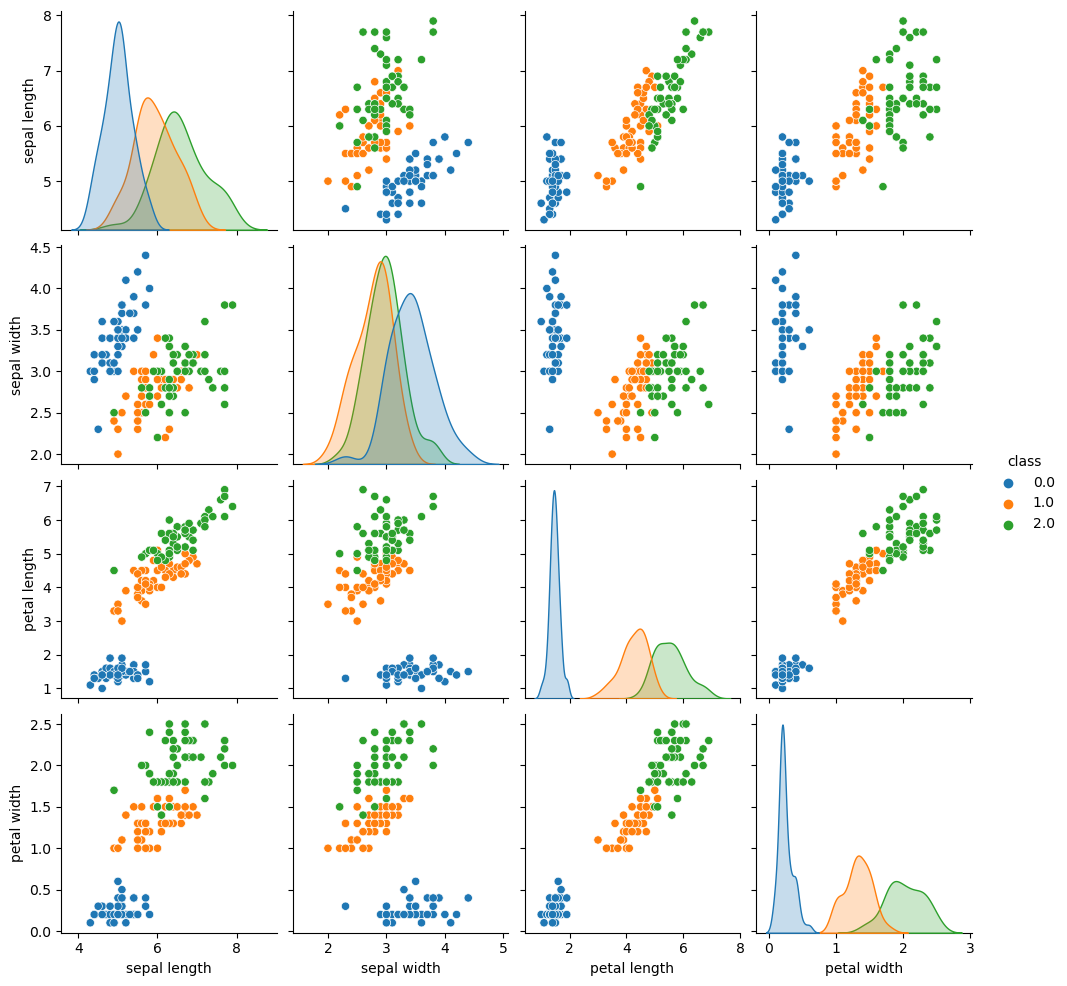

In [9]:
import seaborn as sns
sns.pairplot(iris_df, hue='class', palette="tab10");

# Data Preparation Pipeline

Now it's time to recreate our data preparation pipelines we used in prior weeks. In this lab we will,once again, apply all our data cleaning and transformation operations AFTER splitting the data. 

*Note, in this lab, we don't need to formulate our problem as a binary classification problem as Naive Bayes is capable of doing multi-class classification.* 

## Splitting data

Below, are the splitting functions we'll be using once again to split our data. 

In [10]:
def feature_label_split(df: pd.DataFrame, 
                        label_name: str) -> Tuple[pd.DataFrame]:
    """ Split dataframe into features and labels
    
        Args:
            df: DataFrame containing both features and labels
            
            label_name: Name of the column which contains the labels
    """
    
    X = df.drop(label_name, axis=1)
    y = df[[label_name]].copy()
    
    return X, y

The below `TEST_feature_label_split()` function provides example code for how to call the `feature_label_split()` function.

In [11]:
def TEST_feature_label_split():
    X, y = feature_label_split(iris_df, label_name='class')
    display(X)
    display(y)
    
TEST_feature_label_split()
garbage_collect(['TEST_feature_label_split'])

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


,class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,2.0
146,2.0
147,2.0
148,2.0


In [12]:
from sklearn.model_selection import train_test_split

def train_valid_test_split(X, y, test_size=.2, seed=42):
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=test_size, random_state=seed)
    X_trn, X_vld, y_trn, y_vld = train_test_split(X_trn, y_trn, test_size=test_size, random_state=seed)

    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

The below `TEST_train_valid_test_split()` function provides example code for how to call both functions `feature_label_split()` and `train_valid_test_split()`.

In [13]:
def TEST_train_valid_test_split():
    # Split into features and labels
    X, y = feature_label_split(iris_df, label_name='class')
    # Split into train, validation, and test sets
    data = train_valid_test_split(X, y)
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = data

    print(f"X_trn shape: {X_trn.shape}")
    print(f"y_trn shape: {y_trn.shape}")
    print(f"X_vld shape: {X_vld.shape}")
    print(f"y_vld shape: {y_vld.shape}")
    print(f"X_tst shape: {X_tst.shape}")
    print(f"y_tst shape: {y_tst.shape}")
    
TEST_train_valid_test_split()
garbage_collect(['TEST_train_valid_test_split'])

X_trn shape: (96, 4)
y_trn shape: (96, 1)
X_vld shape: (24, 4)
y_vld shape: (24, 1)
X_tst shape: (30, 4)
y_tst shape: (30, 1)


## Transforming and cleaning data

This module's data cleaning is very easy. All we really need to do is apply standardization to our input features. Keep in mind, we do **NOT** need the `AddBias` class as Naive Bayes does not require any bias term. 

In [14]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

### Feature cleaning

The only feature cleaning classes we'll need is our `Standardization` classes which we redefine for you below.

In [15]:
class Standardization(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.feature_names = None
    
    def fit(self,
            X: pd.DataFrame, 
            y: pd.DataFrame = None) -> pd.DataFrame:
        
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        return self
    
    def transform(self, 
                  X: pd.DataFrame, 
                  y: pd.DataFrame = None) -> pd.DataFrame:
        self.feature_names = X.columns
        return (X  - self.mean) / self.std

    def get_feature_names(self) -> pd.Series:
        return self.feature_names

#### TODO 2
Complete the TODO by finishing the `feature_pipeline()` function.

1. Define an instance of Sklearn's `Pipeline` class which applies the `Standardization` class. Store the output into `feature_pipe`.
    1. Hint: Recall the `Pipeline` class takes in a **list of tuples** where each tuple contains two elements: string and a class instance.
    1. Hint: You can set the first element of each tuple to whatever string you would like.


2. Fit and transform the training data `X_trn` using the `feature_pipe` instance. Store the transformed output into `X_trn_clean`.


3. Transform the validation data `X_vld`. Store the output into `X_vld_clean`.


4. Transform the test data `X_tst`. Store the output into `X_tst_clean`.

In [16]:
def feature_pipeline(
    X_trn: pd.DataFrame, 
    X_vld: pd.DataFrame, 
    X_tst: pd.DataFrame, 
) -> List[pd.DataFrame]:
    """ Creates column transformers and pipelines to apply data cleaning and 
        transfornations to the input features of our data.
        
        Args:
            X_trn: train features
            
            X_vld: validation features
            
            X_tst: test features
    """
    # TODO 2.1
    #apply standardize through sklearn pipeline
    feature_pipe =  Pipeline([('standardize', Standardization())])
    
    
    # TODO 2.2
    #fit and transform x_trn
    X_trn_clean = feature_pipe.fit_transform(X_trn)
    # TODO 2.3
    #transform x_vld
    X_vld_clean = feature_pipe.transform(X_vld)
    # TODO 2.4
    #transform x_tst
    X_tst_clean = feature_pipe.transform(X_tst)
    
    return X_trn_clean, X_vld_clean, X_tst_clean

Run the below `TEST_feature_pipeline()` function to test your `feature_pipeline()` function implementation.

In [17]:
def TEST_feature_pipeline(): 
    # Apply feature and label splitting
    X, y = feature_label_split(iris_df, label_name='class')
    # Apply train, validation and test set splitting
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = train_valid_test_split(X, y)
    # Apply feature cleaning AFTER splitting
    X_trn, X_vld, X_tst = feature_pipeline(X_trn, X_vld, X_tst)

    print(f"X_trn shape: {X_trn.shape}")
    print(f"X_trn type: {type(X_trn)}")
    print(f"X_vld shape: {X_vld.shape}")
    print(f"X_vld type: {type(X_vld)}")
    print(f"X_tst shape: {X_tst.shape}")
    print(f"X_tst type: {type(X_tst)}")
    display(X_trn)

    todo_check([
        (np.all(np.isclose(X_trn.describe().loc['mean'], [0, 0, 0, 0])), "'X_trn' has the wrong mean values"),
        (np.all(np.isclose(X_trn.iloc[:3, 3], [0.77996804,  0.3865691 , -0.2690958], rtol=.01)), "'X_trn' has incorrect values"),
        (np.all(np.isclose(X_vld.iloc[:3, 3], [-0.2690958 ,  0.12430314, -1.31815965], rtol=.01)), "'X_vld' has incorrect values"),
        (np.all(np.isclose(X_tst.iloc[:3, 3], [-0.00682984, -1.18702667,  1.43563294], rtol=.01)),"'X_tst' has incorrect values"),
    ])
    
TEST_feature_pipeline()
garbage_collect(['TEST_feature_pipeline'])

X_trn shape: (96, 4)
X_trn type: <class 'pandas.core.frame.DataFrame'>
X_vld shape: (24, 4)
X_vld type: <class 'pandas.core.frame.DataFrame'>
X_tst shape: (30, 4)
X_tst type: <class 'pandas.core.frame.DataFrame'>


,sepal length,sepal width,petal length,petal width
138,0.161107,-0.237179,0.583828,0.779968
86,1.013582,-0.016119,0.527329,0.386569
81,-0.447803,-1.563541,-0.037666,-0.269096
20,-0.569585,0.647062,-1.167657,-1.318160
112,1.135364,-0.237179,0.979325,1.173367
...,...,...,...,...
130,1.866056,-0.679300,1.318322,0.911101
10,-0.569585,1.310243,-1.280656,-1.318160
58,0.891800,-0.458240,0.470829,0.124303
49,-1.056713,0.426002,-1.337156,-1.318160


Your code PASSED the code check!



## Putting it all together

In order to make our lives easier, we create a function called `data_prep()` which will split the data and apply our target/feature data cleaning and transformations for us. Thus, whenever we go to implement a new algorithm we can call `data_prep()` to give us our preprocessed data.

**Take time to also read the DocStrings or in-line documentation, given at the start of the function, which describes what each argument does. You need to understand what each argument does before moving forward!**

Note: Any arguments in a function given after the `*` in the function definition below MUST be passed using the keyword. See this [post](https://stackoverflow.com/questions/14301967/bare-asterisk-in-function-arguments) for more information.

In [18]:
def data_prep(
    df: pd.DataFrame,
    label_name: str,
    *,
    seed: int = 42,
    return_array: bool = False,
    drop_features: List[str] = None,
) -> Tuple[pd.DataFrame]:
    """ Splits data and runs data cleaning and transformations.
    
        Args:
            df: A Pandas DataFrame containing our dataset for the 
                current lab.
                
            label_name: Name of the column in the DataFrame store in df 
                which will be used as the label/target. This will be 
                passed to the feature_label_split() function.
            
            seed: The seed used when splitting data into train, 
                validation, and test. This will be passed to the
                train_valid_test_split() function.
            
            return_array: A boolean which when True will return all data as NumPy
                arrays instead of Pandas DataFrames.
            
            drop_features: List of feature names to drop from the passed
                DataFrame stored in df.
    """
    # Drop any features we don't want
    if drop_features is not None:
        df = df.drop(drop_features, axis=1)
    
    # Apply feature and label splitting
    X, y = feature_label_split(df, label_name=label_name)
    
    # Apply train, validation and test set splitting
    data = train_valid_test_split(X, y, seed=seed)
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = data
    
    # Feature cleaning
    X_trn, X_vld, X_tst = feature_pipeline(X_trn, X_vld, X_tst)
    
    # Store names of features used 
    feature_names = X_trn.columns

    # Resets the Pandas index for the Dataframe and series
    # This will prevent any headaches when combining or indexing
    # our train, validation, and test data in the future.
    X_trn.reset_index(inplace=True, drop=True)
    y_trn.reset_index(inplace=True, drop=True)
    X_vld.reset_index(inplace=True, drop=True)
    y_vld.reset_index(inplace=True, drop=True)
    X_tst.reset_index(inplace=True, drop=True)
    y_tst.reset_index(inplace=True, drop=True)
        
    # Return data as arrays instead of DataFrames
    if return_array:
        X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = (X_trn.values, 
                                                    y_trn.values, 
                                                    X_vld.values, 
                                                    y_vld.values, 
                                                    X_tst.values, 
                                                    y_tst.values)
                               
    
    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst, feature_names

#### TODO 3
Complete the TODO by practicing calling the `data_prep()` function using different arguments.

**Before attempting this TODO, read through the documentation of `data_prep()` in the above code cell. You need to understand what each  argument means in order to complete this and coming TODOs!!!**

1. Call the `data_prep()` function to return the three-way multi-class classification Iris data formatted as NumPy arrays. To do so, pass the  arguments to `data_prep()` that  corresponding to the following descriptions:
    1. Pass the Iris dataset.
    1. Set the column 'class' to act as the labels/targets.
    1. Return all data as NumPy arrays.

In [19]:
def TEST_data_prep():
    # TODO 3.1
    #dataprep with the data set, label, and return array arguments
    data= data_prep(df=iris_df, label_name='class', return_array=True)
    X_trn, y_trn, X_vld, y_vld, X_tst, y_tst, _ = data

    print(f"X_trn type: {type(X_trn)}")
    print(f"X_trn shape: {X_trn.shape}")
    print(f"y_trn shape: {y_trn.shape}")
    print(f"X_vld shape: {X_vld.shape}")
    print(f"y_vld shape: {y_vld.shape}")
    print(f"X_tst shape: {X_tst.shape}")
    print(f"y_tst shape: {y_tst.shape}")

    todo_check([
        (type(X_trn) is np.ndarray, "'X_trn' is not type np.ndarray"),
        (type(y_tst) is np.ndarray,"'y_tst' is not type np.ndarray"),
        (np.all(np.isclose(np.unique(y_trn).flatten(), [0, 1, 2])), "y_trn does not have all the unique class label values [0, 1, 2]"),
    ])
    
TEST_data_prep()
garbage_collect(['TEST_data_prep'])

X_trn type: <class 'numpy.ndarray'>
X_trn shape: (96, 4)
y_trn shape: (96, 1)
X_vld shape: (24, 4)
y_vld shape: (24, 1)
X_tst shape: (30, 4)
y_tst shape: (30, 1)
Your code PASSED the code check!


# Defining Classification Metrics and Plots

Before we get to our algorithms, let's first define the metrics and plots we'll be using to assess how good predictions are. 


## Metrics

### Accuracy
Below we redefine the `accuracy()` function which you defined in last module's lab.

In [20]:
def accuracy(y_hat, y):
    total_correct = np.sum(y_hat == y)
    total_samples = len(y)
    print(f"Accuracy ratio: {total_correct}/{total_samples}")

    return total_correct / total_samples

### Confusion Matrix

Keep in mind, we will be looking at multi-class classification which means the confusion matrix will be a 3x3 since we have 3 classes. Recall the confusion for **binary classification** looked like the below image.

<img src="http://www.andrewgurung.com/wp-content/uploads/2018/12/confusion_matrix.png" width=500 height=500>


The below image is what a **multi-class classification confusion matrix** looks like. Further, the below image shows how to determine the false positives, true positives, false negatives, and true negatives for each class. More on this later in the lab.


<img src="https://i.stack.imgur.com/AuTKP.png" width=300 height=300>


In [21]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_hat, y, class_names=None):
    cfm = confusion_matrix(y_pred=y_hat, y_true=y)
    
    labels = np.sort(np.unique(y))
    if class_names is not None:
        classes = []
        for l in labels:
            class_name = class_names.get(l, l)
            classes.append(class_name)
        labels = classes
        
    columns, index = labels, labels
    cfm_df = pd.DataFrame(cfm, index=index, columns=columns)
    sns.heatmap(cfm_df, annot=True)
    plt.xlabel('Predicted', fontsize=14)
    plt.ylabel('Actual', fontsize=14)
    
    return cfm.flatten()

### Other scores

Below we define functions for the positive predictive value (PPV) or precision, True positive rate (TPR) or recall, and true negative rate (TNR) or specificity.

$$
\text{PPV} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

$$
\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

$$
\text{TNR} = \frac{\text{TN}}{\text{TN} + \text{FP}}
$$

Lastly, we define `compute_scores()` which will automatically compute the PPV, TPR, and TNR scores for each class using the multi-class confusion matrix.

In [22]:
def ppv(tp, fp):
    return tp / (tp + fp)

def tpr(tp, fn):
    return tp / (tp + fn)

def tnr(tn, fp):
    return tn / (tn + fp)

def compute_scores(y, y_hat, class_names=None):
    def print_scores(tn, fn, fp, tp):

        print(f"\tPPV ratio tp/(tp+fp): {tp}/{tp+fp}")
        print(f"\tPPV (precision): {ppv(tp=tp, fp=fp) }\n")

        print(f"\tTPR ratio tp/(tp+fn): {tp}/{tp+fn}")
        print(f"\tTPR (recall/sensitivity): {tpr(tp=tp, fn=fn)}\n")

        print(f"\tTNR ratio tn/(tn+fp): {tn}/{tn+fp}")
        print(f"\tTNR (specificity): {tnr(tn=tn, fp=fp)}")
    
    if class_names is None:
        class_names = {}
    
    # Convert y from one-hot encoding back to normal
    if len(y.shape) > 1 and y.shape[-1] > 1:
        y = np.argmax(y, axis=1).reshape(-1,1)
    
    cm = confusion_matrix(y_true=y, y_pred=y_hat)
    
    # Computing multi-class classification tp, fn, tp, tn
    fp = cm.sum(axis=0) - np.diag(cm)  
    fn = cm.sum(axis=1) - np.diag(cm)
    tp = np.diag(cm)
    tn = cm.sum() - (fp + fn + tp)
    
    ppv_ = ppv(tp=tp, fp=fp) 
    tpr_ = tpr(tp=tp, fn=fn)
    tnr_ = tnr(tn=tn, fp=fp)
    
    class_labels = np.unique(y)
    
    if len(class_labels) == 2:
        class_name = class_names.get(class_labels[-1], class_labels[-1])
        print(f"Scores for binary problem: positive label is {class_name}")
        print_scores(tn[-1], fn[-1], fp[-1], tp[-1])
    else:
        for i, label in enumerate(class_labels):
            class_name = class_names.get(label, label)
            print(f"Scores for class {class_name}")
            print_scores(tn[i], fn[i], fp[i], tp[i])

    return ppv_, tpr_, tnr_

## Plots

Below, the function `plot_decision_boundary()` is defined. This function aims to draw the decision boundary using a contour plot. This function will only work when our data has 2 features. Remember, having more than 2-3 features (i.e., higher dimensional features) means we have a much hard time visualizing the data. 

In [23]:
def plot_decision_boundary(
    gnb, 
    X: np.ndarray, 
    y: np.ndarray,
    xlabel: str = '',
    ylabel: str = '',
    class_names=None):
    if class_names is None:
        class_names = {}

    # Generate fake data to cover entire space of our input features X
    buffer = .5
    x_min, x_max = X[:, 0].min() - buffer, X[:, 0].max() + buffer
    y_min, y_max = X[:, 1].min() - buffer, X[:, 1].max() + buffer
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
                         np.arange(y_min, y_max, .02))
    fake_data = np.c_[xx.ravel(), yy.ravel()].reshape(-1,2)

    # Make prediction
    y_hat = gnb.predict(fake_data)

    # Plot
    plt.contourf(xx, yy, y_hat.reshape(xx.shape))
    
    labels = np.unique(y)
    for l in labels:
        class_locs = np.where(y == l)[0]
        class_X = X[class_locs]
        class_name = class_names.get(l, f'class {l}')
        plt.scatter(class_X[:, 0], class_X[:, 1], label=class_name)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Gaussian Naive Bayes 
It's time to begin implementing Gaussian Naive Bayes. Recall that our goal is to compute the $\log$ maximum a posteriori (MAP) which will give us the class label prediction for each data sample. To refresh, the MAP equation is given as follows:

$$
\begin{align}
\hat{y}_{MAP} &= \arg \max_{k \in K} \log P(y_k) + \sum_{i=0}^n \log P(x_i|y_k) \\
&=  \arg \max_{k \in K} \log P(\xv \mid y_k) + \log P(y_k). \\
\end{align}
$$

Thus, to do so, we need to compute the log likelihoods $\log P(\xv \mid y_k)$ and the priors $\log P(y_k)$ for each class. Once we do this, we can add  the log likelihoods and the log priors to get what we call the *joint log likelihood*. Then, all we need to do is extract the predicted class label by taking the $\arg \max$ of the joint log likelihoods $ \arg \max_{k \in K} \log P(\xv \mid y_k) + \log P(y_k)$.

Like in the notes, we are going to implement each part of Gaussian Naive Bayes piece-by-piece so we can develop a concrete understanding for what the likelihood and priors correspond to. Before that, let's recall what Gaussian Naive Bayes is and how it works. Below is the quick explanation of Gaussian Naive Bayes from our notes.

> Gaussian Naive Bayes aims to expand Naive Bayes to work with continuous features. Typically, [classical Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#categorical-naive-bayes) (also called Categorical Naive Bayes) computes the likelihood $P(\xv \mid y_k)$ for each feature in a class by counting the frequency of unique values (i.e., categories) and dividing by the total number of values seen for said feature. Notice, that is impossible for continuous features since almost all the values for the continuous feature will be unique. Therefore, classical Naive Bayes can only be used on discrete/categorical features. Thus, we need a different approach that works for continuous features.
>
> Gaussian Naive Bayes computes the likelihood $P(\xv \mid y_k)$ by modeling each feature as a Gaussian distribution (i.e., Gaussian Naive Bayes assumes our data follows a Gaussian distribution which may not be true). By doing so, Gaussian Naive Bayes **ONLY** works with continuous features. 
>
> All we need to do to compute the likelihoods $P(\xv \mid y_k)$ is for every class, we need to compute the mean and standard deviation for every continuous feature. We do so using the training data only. Once this is done, we can simply pass any data along with the means and standard deviations to the Gaussian equation to compute the likelihoods for all data samples and classes!
>
> Recall, to make a prediction we will use the $\log$ of the MAP equation given previously! That being said, keep in mind that when the priors $P(y_k)$ are equal for all classes, MAP essentially reduces to a scaled version ML. We can compute the priors $P(y_k)$ for each class by computing the ratio of data samples per class divided by the total number of data samples.



## Computing log priors P(Y)
The first components of the MAP equation we need to compute are the priors $P(y_k)$ for each class. To do so, we simply count the number of training data samples for each class and divide by the total number of training data samples. Doing so will give us the proportion of each class in the training data. This will act as a naive way to compute the prior if you don't have additional expert knowledge about your dataset.

#### TODO 4
Complete the TODO by computing the prior and the log of the prior for the **setosa class ONLY**. Follow the below TODOs to do so. If you are struggling refer to the notes for help!

1. First, since we only want to focus on the setosa class at the current moment, we need to find all the setosa data sample indexes in the training data. Remember, we can do so by using NumPy's `np.where()` function to search for the all the labels in the training labels array `y_trn` that have the setosa class label 0. Store the output into `setosa_indexes`.
    1. Hint: Don't forget to index the output of `np.where()` as it returns a tuple!!!
    
    
2. Next, we need to compute the prior $P(y_\text{setosa})$ for the setosa class. Remember, this simply means we need to compute the proportion of data samples in the training dataset that belong to the setosa class. Follow the following instructions to do so:
    1. First, we need to find the total number of data samples that belong to the setosa class within the training dataset. One way to do this is by using NumPy's `np.unique()` in conjunction with the setosa labels stored in `setosa_y`. `np.unique()` returns a array of unique values that were found in the passed array. Additionally, it *can* return the total count for how many times each unique value appeared in the array if you specify the argument `return_count`! We can use this argument to return the number number of data samples that belong to the setosa class. Refer to the [docs](https://numpy.org/doc/stable/reference/generated/numpy.unique.html) to learn more about `np.unique()`.
        1. Note: Optionally, you could just use `len(setosa_y)` to compute the total number of data samples for the setosa class ONLY. However, you'll see shortly that `np.unique()` can compute the total number of data samples for each class automatically for us.
    2. Store the outputs into `class_labels` and `class_count`.
 
 
3. Compute the prior $P(y_\text{setosa})$  for the setosa class by dividing the total number of setosa data samples by the total number of data samples in the training data. Store the output into `setosa_prior`.
    1. Hint: To get the total number of data of training samples we can use the `len()` function or `.shape()` method on either our `X_trn` or `y_trn` variables.
    
    
4. Compute the log of the setosa prior $\log P(y_\text{setosa})$ using `setosa_prior` and NumPy's `np.log()` function. Store the output into `setosa_log_prior`.


In [24]:
# Load the training data
data = data_prep(df=iris_df, label_name='class', return_array=True)
X_trn, y_trn, _, _, _, _, _ = data

# TODO 4.1
#use np.where to find y_trn with label 0
setosa_indexes = np.where(y_trn == 0)[0]
print(f"Setosa locations/indexes:\n{setosa_indexes}")

setosa_X = X_trn[setosa_indexes]
setosa_y = y_trn[setosa_indexes]

todo_check([
    (setosa_indexes.shape == (32,), 'setosa_indexes shape is not (32,)'),
    (np.sum(setosa_indexes) == 1573, "setosa_indexes values are incorrect"),
])

Setosa locations/indexes:
[ 3  7 15 16 19 20 27 29 32 34 35 37 41 42 43 44 46 47 51 61 62 63 65 66
 67 75 76 79 90 92 94 95]
Your code PASSED the code check!


In [25]:
# Feature vectors for each setosa data sample
setosa_X

array([[-0.56958464,  0.64706191, -1.16765695, -1.31815965],
       [-1.42205876,  0.20494132, -1.39365507, -1.31815965],
       [-0.81314868,  2.194484  , -1.28065601, -1.44929263],
       [-0.93493069,  0.42600162, -1.16765695, -0.9247607 ],
       [-0.93493069,  1.53130311, -1.05465789, -1.05589368],
       [-0.93493069,  1.31024281, -1.28065601, -1.05589368],
       [-0.93493069,  0.64706191, -1.28065601, -1.31815965],
       [-1.78740481, -0.45823958, -1.33715554, -1.31815965],
       [-0.81314868,  0.86812221, -1.28065601, -1.31815965],
       [-1.78740481, -0.23717928, -1.39365507, -1.31815965],
       [-1.90918683, -0.23717928, -1.50665412, -1.44929263],
       [-1.05671271,  0.86812221, -1.39365507, -1.18702667],
       [-1.05671271,  1.08918251, -1.33715554, -1.31815965],
       [-0.56958464,  1.7523634 , -1.39365507, -1.05589368],
       [-0.93493069,  1.53130311, -1.22415648, -1.31815965],
       [-1.30027674,  0.64706191, -1.22415648, -1.31815965],
       [-1.54384078,  0.

In [26]:
# Labels for each setosa data sample
setosa_y

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [27]:
# TODO 4.2
#find total number of setosa data samples
setosa_label, setosa_count = np.unique(setosa_y, return_counts=True)

todo_check([
    (np.all(setosa_label == np.array([0.])), 'setosa_label label is not equal to the label 0'),
    (np.all(setosa_count == np.array([32])), 'setosa_count is not equal to 32'),
])

Your code PASSED the code check!


Below we can see `setosa_label` contains a single label of 0. This should be expected as we are using just the setosa data right now. 

In [28]:
setosa_label

array([0.])

Next, we can see the counts for the setosa class. Since setosa is the first element in `setosa_label`, the first element of `setosa_count` corresponds to the setosa class (when we have more classes keep this idea in mind). This means, setosa has 32 data samples in the training data.

In [29]:
setosa_count

array([32], dtype=int64)

In [30]:
# TODO 4.3
#compute setosa prior
setosa_prior = setosa_count / len(y_trn)
print(f"Setosa prior: {setosa_prior}")

todo_check([
    (np.isclose(setosa_prior, np.array([0.33333333]),rtol=.1) , "setosa_prior value is incorrect")
])

Setosa prior: [0.33333333]
Your code PASSED the code check!


In [31]:
# TODO 4.4
#compute log of setosa prior
setosa_log_prior = np.log(setosa_prior)
print(f"Setosa log prior: {setosa_log_prior}")

todo_check([
     (np.isclose(setosa_log_prior, np.array([-1.09861229])), "setosa_log_prior value is incorrect"),
])

Setosa log prior: [-1.09861229]
Your code PASSED the code check!


In [32]:
garbage_collect(['setosa_prior', 'setosa_log_prior', 'setosa_count', 'setosa_label', 'setosa_indexes', 'data', 'X_trn', 'y_trn'])

#### TODO 5
Complete the TODO by implementing the `compute_priors()` function. To do so, follow the same steps we just used to compute the prior and log prior for the setosa class, however now do so for all classes!

**Hint: You do NOT need to use any for loops for this function! Simply reuse the code we used in the prior TODO but now generalize it to so that we compute the priors for ALL classes at once!**

1. Compute the counts (i.e., number of data samples) for each of the unique class labels contained in `y`. To do so, simply use the `np.unique()` function as we just did above but now pass ALL the labels passed to the argument `y`. Store the outputs into `class_labels` and `class_counts`.


2. Compute the total number of data samples using `len()` function or `.shape()` method on the passed labels `y`. Store the output into `total_data_samples`.


3. Compute the priors $P(y_k)$  for ALL classes. Store the output into `priors`.


4. Compute the log priors $\log P(y_k)$  for ALL classes. Store the output into `log_priors`.

In [33]:
def compute_log_priors(y: np.ndarray, verbose: bool = False):
    """ Computes the log priors for each class
    
        Args:
            y: Lables
            
            verbose: If True prints info about priors
    """
    # TODO 5.1
    #compute the counts of unique class labels in y
    class_labels, class_counts = np.unique(y, return_counts=True)
    # TODO 5.2
    #compute total data samples using len()
    total_data_samples = len(y)
    # TODO 5.3
    #compute prioors for all classes
    priors = class_counts/total_data_samples
    # TODO 5.4
    #compute log of priors for all classes
    log_priors = np.log(priors)
    
    if verbose:
        print(f"class_labels: {class_labels}")
        print(f"class_counts: {class_counts}")
        print(f"priors: {priors}")
        print(f"log_priors: {log_priors}")
        print("\nNumber of samples per class")
        for c, label in enumerate(class_labels):
            print(f"\t Class: {c} Label: {label} Count: {class_counts[c]}")
    
    return log_priors

Run the below `TEST_compute_log_priors()` function to test your implementation of the `compute_log_priors()` function.

In [34]:
def TEST_compute_log_priors():
    # Load the training data
    data = data_prep(df=iris_df, label_name='class', return_array=True)
    X_trn, y_trn, _, _, _, _, _ = data
    
    # Compute the log priors
    log_priors = compute_log_priors(y_trn, verbose=True)

    todo_check([
        (np.all(np.isclose(log_priors, np.array([-1.09861229, -1.16315081, -1.03798767]))), "log_priors values are incorrect")
    ])
    
TEST_compute_log_priors()
garbage_collect(['TEST_compute_log_priors']) 

class_labels: [0. 1. 2.]
class_counts: [32 30 34]
priors: [0.33333333 0.3125     0.35416667]
log_priors: [-1.09861229 -1.16315081 -1.03798767]

Number of samples per class
	 Class: 0 Label: 0.0 Count: 32
	 Class: 1 Label: 1.0 Count: 30
	 Class: 2 Label: 2.0 Count: 34
Your code PASSED the code check!


Notice, in the above output how each class has a different number of data samples (refer to the "class_counts" print statement). This is because our training data is randomly selected, thus only approximately balanced. Meaning, if your data set is perfectly balanced your training data might not actually be!

Further, notice that the priors all sum to 1. We can see that setosa (label 0) has 32 samples and a prior of ~33% while versicolor (label 1)  has 30 samples and a prior of ~31%. Lastly, we can see that virginica (label 2) has 34 samples and a prior of ~35%.

Finally, notice that the log transformed priors are not really all that interpretable. Thus, it is often best to refer to the plain priors to build intuition about your data!

## Computing log likelihoods logP(X | Y)

The next components for the MAP equation we need to compute are the $\log P(\xv \mid y_k)$ likelihoods for each class. **In order to do so, we will need to model EACH continuous features' distribution for EVERY class**. In order to model the distribution for a continuous feature, we need to select a distribution to use. Gaussian Naive Bayes aims to model the feature distributions using a Gaussian distribution.

This means, all we need to do to compute $\log P(\xv \mid y_k)$ is for each class, compute the mean and standard deviation for every continuous feature. We do so using the training data only!

Remember, the feature log likelihoods $\{\log  P(x_1 \mid y_k), \log P(x_2 \mid y_k), ..., \log P(x_n \mid y_k)\}$ are used to compute the log likelihood for a class. Recall, the following equation uses each feature's log likelihood (i.e., feature distributions) to compute the log likelihood for the current class $k$:
$$
\begin{align}
\log P(\xv | y_k) &= \log P(x_1|y_k) + \log P(x_2|y_k) + ... + \log P(x_n|y_k) \\
&= \sum_{i=0}^n \log P(x_i|y_k)
\end{align}
$$


### Gaussian distribution

Recall that a [normal or Gaussian distribution](https://machinelearningmastery.com/statistical-data-distributions/) has the parameters $\mu$ (referred to as mu) which represents the mean and $\sigma$ (referred to as sigma) represents the standard deviation. An image of a Gaussian is given below.
 
 
<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fthumb%2Fc%2Fc8%2FGaussian_distribution.svg%2F1280px-Gaussian_distribution.svg.png&f=1&nofb=1" width=500 height=500>


The formula for computing a normal distribution is given as follows:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/00cb9b2c9b866378626bcfa45c86a6de2f2b2e40)



#### TODO 6
Compute the TODO by implementing the `gaussian_distribution()` function.

1. Define a function called `gaussian_distribution()` that takes in the arguments `X`, `mu`, and `sig`. Convert the above Gaussian distribution equation, given above, into code and return the output of the equation. Recall that `mu` represents the mean $\mu$, `sig` represents standard deviation (std) $\sigma$ and `X` represents the data $x$.
    1. Hint: Use NumPy's `np.sqrt()` for the square root and `np.exp()` for the exponential $e$.
    1. Hint: Try breaking the equation into parts instead of computing the entire equation in one line!

In [35]:
# TODO 6.1
def gaussian_distribution(X:np.ndarray, mu:np.ndarray, sig:np.ndarray):
    """ Computes the value at a given point in a Gaussian distribution
    
        Args:
            X: Data for which an output value is computed for.
            
            mu: Feature means
            
            sig: Feature standard deviations
    """
    #pass # Replace this line with your code
    #broke up the equation into two parts the first parts like the hint suggested
    term1 = 1 / (sig * np.sqrt(2 * np.pi))
    term2 = np.exp(-(X - mu)**2 / (2 * sig**2))
    return term1 * term2

Run the below `TEST_gaussian_distribution()` function to check your `gaussian_distribution()` function implementation.

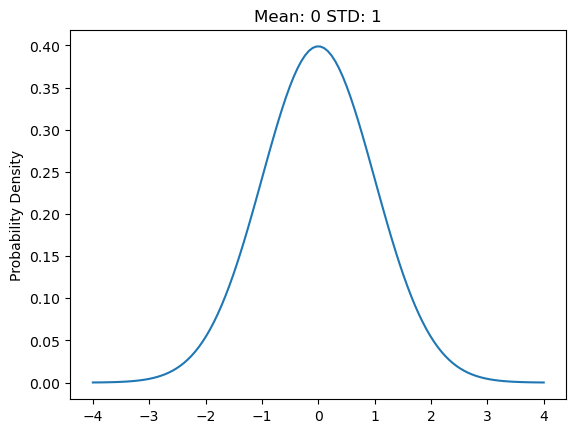

Your code PASSED the code check!


In [36]:
def TEST_gaussian_distribution():
    mu, sig = 0, 1
    x_values = np.linspace(-4, 4, 120)
    y_values = gaussian_distribution(x_values, mu=mu, sig=sig)

    plt.plot(x_values, y_values)
    plt.title(f"Mean: {mu} STD: {sig}")
    plt.ylabel(f"Probability Density")
    plt.show()

    todo_check([
        (np.all(np.isclose(y_values[:4], [0.00013383, 0.00017473, 0.00022709, 0.00029382], rtol=.01)), "The y_values for the gaussian distribution seem to be incorrect!")
    ])
    
TEST_gaussian_distribution()
garbage_collect(['TEST_gaussian_distribution'])

### Computing parameters
Now, onto computing the mean $\mu$ and std $\sigma$ for our training data.  Let's start by practicing computing the mean and std for the just the setosa class data again!

#### TODO 7
Complete the TODO by finding the **mean** of each feature for the **setosa data ONLY**.

1. Compute the mean for **each feature** in the `setosa_X` data. Store the output into `setosa_mean`.
    1. Hint: Remember to pass the correct axis! Recall we are taking the mean, therefore whichever axis we specify is the axis that will be REDUCED over, meaning it will be removed.

In [37]:
# TODO 7.1
#compute mean for each feature in setosa_X
setosa_means = np.mean(setosa_X, axis=0)

todo_check([
    (setosa_means.shape == (4,), "setosa_means shape is not (4,)"),
    (np.all(np.isclose(setosa_means, np.array([-0.99201601,  0.93720356, -1.30360894, -1.24849525]))), "setosa_means has incorrect values")
])

Your code PASSED the code check!


In [38]:
setosa_means_df = pd.DataFrame(setosa_means.reshape(1, -1), index=["setosa mean"], columns=iris.feature_names)
setosa_means_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa mean,-0.992016,0.937204,-1.303609,-1.248495


#### TODO 8
Complete the TODO by finding the **standard deviation** of each feature for the **setosa data ONLY**.

1. Compute the standard deviation for **each feature** in the `setosa_X` data. Store the output into `setosa_std`.
    1. Hint: Remember to pass the correct axis! Recall we are taking the std, therefore whichever axis we specify is the axis that will be REDUCED over and removed.

In [39]:
# TODO 8.1
#compute standard deviation for each feature 
setosa_stds = np.std(setosa_X, axis=0)

todo_check([
    (setosa_stds.shape == (4,), "setosa_stds shape is not (4,)"),
    (np.all(np.isclose(setosa_stds, np.array([0.42184812, 0.7843699 , 0.09247147, 0.1501758 ]))),  "setosa_stds has incorrect values")
])

Your code PASSED the code check!


In [40]:
setosa_stds_df = pd.DataFrame(setosa_stds.reshape(1, -1), index=["setosa std"], columns=iris.feature_names)
setosa_stds_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa std,0.421848,0.78437,0.092471,0.150176


In [41]:
garbage_collect(['setosa_stds_df', 'setosa_stds', 'setosa_means_df', 'setosa_means'])

#### TODO 9
Now, it's time to generalize our code to work for ALL classes. Complete the TODO by finishing the `compute_parameters()` function which uses ideas from the previous TODOs.

1. Find all the unique labels in the passed labels `y`. We need to do this so we have access to each unique class label. Store the output into `class_labels`.


2. Create a `for` loop that loops over each label in `class_labels`. The name of the for-loop's variable should be called `label`. You can use the Python keyword `for` in conjunction with `in` to do so.  
    1. Hint: See this [guide](https://www.w3schools.com/python/python_for_loops.asp) for how to write a for-loop using `for` and `in`.


3. Find the indexes/locations of all data samples for the current class label `label` by searching for them using `np.where()`. Store the output in `class_locs`.
    1. Hint: Don't forget to index the output of `np.where()` as it returns a tuple!!!
    1. Hint: Refer to the notes and TODO 4.1 to recall how to find the indexes of the data samples for a particular label.


4. Compute the **mean** for **each feature** in the `class_X` data. Store the output into `class_mean`.
    1. Hint: Remember to pass the correct axis! Recall we are taking the mean, therefore whichever axis we specify is the axis that will be REDUCED over and removed.
    
    
5. Compute the **std** for **each feature** in the `class_X` data. Store the output into `class_std`.
    1. Hint: Remember to pass the correct axis! Recall we are taking the std, therefore whichever axis we specify is the axis that will be REDUCED over and removed.

def compute_parameters(
    X:np.ndarray, 
    y:np.ndarray,
    smoothing: float = 10e-3
):
    """ Computes the means and standard deviations for classes and features
    
        Args:
            X: Data 
            
            y: Labels
            
            smoothing: Default STD value which prevents the STD from ever 
                being 0 which. If the STD is ever 0 numerical instabilities
                can occur.
    """
    # TODO 9.1
    #find all unique labels in y
    class_labels = np.unique(y)
    
    means = []
    stds = []
    # TODO 9.2
    #for loop with in class_labels
    for label in class_labels:
        # TODO 9.3
        #condition used to find indexes of all data samples
        class_locs =np.where(y == label)[0] 
        class_X = X[class_locs]
        
        # TODO 9.4
        #compute mean for each feature in class_X
        class_mean = np.mean(class_X, axis=0)
        means.append(class_mean)
        
        # TODO 9.5
        #compute std for each feature in class_X
        class_std = np.std(class_X, axis=0)
        stds.append(class_std)
    
    means = np.vstack(means)
    stds = np.vstack(stds) + smoothing
    return means, stds

Run the below `TEST_compute_parameters()` function to test your implementation for `compute_parameters()` function.

In [43]:
def TEST_compute_parameters():
    # Load Iris data
    data = data_prep(df=iris_df, label_name='class', return_array=True)
    X_trn, y_trn, _, _, _, _, _ = data
    
    # Compute mean and std for each class
    means, stds = compute_parameters(X_trn, y_trn)
    
    todo_check([
        (np.all(np.isclose(np.diagonal(means), [-0.99201601, -0.7014059 ,  0.99594269], rtol=.01)), "means has incorrect values"),
        (np.all(np.isclose(np.diagonal(stds), [0.43184812, 0.68619403, 0.32173667], rtol=.01)),  "stds has incorrect values"),
    ])
    
    return means, stds
    
means, stds = TEST_compute_parameters()
garbage_collect(['TEST_compute_parameters'])

Your code PASSED the code check!


To further visualize the output of the `compute_parameters()` function, we can convert our basic NumPy array, which holds the means and stds for every class and feature, into a DataFrame.

Below are the means for each class and all the features. As we can see, we have 3 classes and 4 features. Therefore, we have 12 means!

In [44]:
means_df = pd.DataFrame(means, index=iris.target_names, columns=iris.feature_names)
print("{:=^50}".format("Iris Training Data Feature Means"))
means_df

=========Iris Training Data Feature Means=========


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,-0.992016,0.937204,-1.303609,-1.248495
versicolor,0.112395,-0.701406,0.261781,0.141788
virginica,0.834490,-0.263186,0.995943,1.049948


Below are the standard deviations for each class and all the features. As we can see once again, we have 3 classes and 4 features. Therefore, we have 12 stds!

In [45]:
stds_df = pd.DataFrame(stds, index=iris.target_names, columns=iris.feature_names)
print("{:=^50}".format("Iris Training Data Feature STDs"))
stds_df

=========Iris Training Data Feature STDs==========


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
setosa,0.431848,0.794370,0.102471,0.160176
versicolor,0.707886,0.686194,0.284532,0.276027
virginica,0.779784,0.724840,0.321737,0.400743


In [46]:
garbage_collect(['means_df', 'stds_df', 'means', 'stds'])

### Computing log likelihoods

Finally, now that we have computed the parameters (mean and std) for each class and feature we can compute the log likelihoods $P(\xv \mid y_k)$. Once again, let's start off by just computing the log likelihood for the setosa class.

#### TODO 10
1. Compute the setosa mean and std by passing `setosa_X` and `setosa_y` to the `compute_parameters()` function. Store the outputs into `setosa_means` and `setosa_stds`.


2. Compute the setosa feature likelihoods for ALL the training data `X_trn` by passing `X_trn`, `setosa_means`, and `setosa_stds` to the `gaussian_distribution()` function. Store the output into `feature_likelihoods`.


3. Compute the setosa feature log likelihoods by taking the log of `feature_likelihoods`. Store the output into `feature_log_likelihoods`.


4. Compute the log likelihood for the setosa class $P(\xv \mid y_\text{setosa})$  by summing all the feature log likelihoods in `feature_log_likelihoods`. Refer to below equation to refresh your memory on how to compute a class's log likelihood.
    1. Hint: Try using `np.sum()` and specifying the correct axis! Recall  whichever axis we specify is the axis that will be REDUCED over and removed.

$$
\begin{align}
\log P(\xv | y_\text{setosa}) &= \log P(x_1|y_\text{setosa}) + \log P(x_2|y_\text{setosa}) + ... + \log P(x_n|y_\text{setosa}) \\
&= \sum_{i=0}^n \log P(x_i|y_\text{setosa})
\end{align}
$$

In [47]:
# Load Iris data
data = data_prep(df=iris_df, label_name='class', return_array=True)
X_trn, y_trn, _, _, _, _, _ = data

# TODO 10.1
#setosa mean calulated with setosa_X and setosa_y parameters
setosa_means, setosa_stds = compute_parameters(setosa_X, setosa_y)

todo_check([
    (setosa_means.shape == (1, 4), "setosa_means is does not have shape (1, 4)"),
    (np.all(np.isclose(setosa_means, np.array([[-0.99201601,  0.93720356, -1.30360894, -1.24849525]]), rtol=.01)), "setosa_means has incorrect values"),
    (setosa_stds.shape == (1, 4), "setosa_stds is does not have shape (1, 4)"),
    (np.all(np.isclose(setosa_stds, np.array([[0.43184812, 0.7943699 , 0.10247147, 0.1601758]]), rtol=.01)), "setosa_stds has incorrect values"),
])

Your code PASSED the code check!


In [48]:
# TODO 10.2
#compute likelihoods of X_trn using gaussian distribuation method
feature_likelihoods = gaussian_distribution(X_trn, setosa_means, setosa_stds)

todo_check([
    (feature_likelihoods.shape == (96, 4), "feature_likelihoods does not have the shape (96, 4)"),
    (np.isclose(feature_likelihoods[0, 1], 0.1683785, rtol=.01), "feature_likelihoods has incorrect values")
])

Your code PASSED the code check!


Wrapping the `feature_likelihoods` in a DataFrame we can see the likelihoods for each data sample and feature. Recall, the likelihood values here are really uninterpretable since the likelihood really isn't a probability. Thus, interpreting the values of `feature_likelihoods` is hard. That's okay though, we are really interested in the end product, the class label prediction. 

In [49]:
feature_likelihoods_df = pd.DataFrame(feature_likelihoods, columns=iris.feature_names)
feature_likelihoods_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,2.614081e-02,0.168379,8.314299e-74,3.724071e-35
1,1.914161e-05,0.244424,1.838197e-69,5.876859e-23
2,4.175694e-01,0.003539,2.808555e-33,1.895530e-08
3,5.725305e-01,0.469806,1.614662e+00,2.265884e+00
4,4.965047e-06,0.168379,6.472313e-108,5.664462e-50
...,...,...,...,...
91,2.846487e-10,0.063340,2.665990e-142,8.371685e-40
92,5.725305e-01,0.449780,3.796751e+00,2.265884e+00
93,6.815475e-05,0.107349,2.998679e-65,2.791409e-16
94,9.134933e-01,0.408281,3.690069e+00,2.265884e+00


In [50]:
# TODO 10.3
#compute feature log likelihood for setosa class
feature_log_likelihood = np.log(feature_likelihoods)

todo_check([
    (feature_log_likelihood.shape == (96, 4), "feature_log_likelihood does not have the shape (96, 4)"),
    (np.isclose(feature_log_likelihood[0, 1], -1.78154, rtol=.01), "feature_log_likelihood has incorrect values")
])

Your code PASSED the code check!


Below we can see another prettier print out of `feature_log_likelihood`. Notice, only the values have changed since we took the log.

In [51]:
feature_ll_df = pd.DataFrame(feature_log_likelihood, columns=iris.feature_names)
feature_ll_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-3.644258,-1.781540,-168.273320,-79.275661
1,-10.863646,-1.408851,-158.269586,-51.188435
2,-0.873305,-5.643955,-74.952638,-17.781182
3,-0.557689,-0.755435,0.479126,0.817965
4,-12.213088,-1.781540,-246.811656,-113.395043
...,...,...,...,...
91,-21.979765,-2.759244,-325.986508,-89.978549
92,-0.557689,-0.798996,1.334146,0.817965
93,-9.593730,-2.231671,-148.569859,-35.814815
94,-0.090479,-0.895799,1.305645,0.817965


In [52]:
# TODO 10.4
#compute log likelihood for setosa class
setosa_log_likelihood = np.sum(feature_log_likelihood, axis=1)

todo_check([
    (setosa_log_likelihood.shape == (96,), "setosa_log_likelihood does not have the shape (96,)"),
    (np.isclose(setosa_log_likelihood[0], -252.974778, rtol=.01), "setosa_log_likelihood has incorrect values")
])

Your code PASSED the code check!


Below is the pretty print out of `class_log_likelihoods`. Notice that we now only have a single log likelihood value for each data sample. This is the log likelihood a data sample belongs to the setosa class $\log P(\xv \mid y_\text{setosa})$. Here, we can roughly say the larger the value the more likely the data sample belongs to the setosa class. However, without the other class log likelihoods we can't say what the predicted label would be.

In [53]:
setosa_ll_df = pd.DataFrame(setosa_log_likelihood, columns=['Setosa Likelihood'])
setosa_ll_df

,Setosa Likelihood
0,-252.974779
1,-221.730518
2,-99.251079
3,-0.016034
4,-374.201327
...,...
91,-440.704066
92,0.795425
93,-196.210076
94,1.137332


In [54]:
garbage_collect(['feature_log_likelihood', 'setosa_log_likelihood', 'feature_ll_df', 'setosa_ll_df', 'setosa_log_likelihood',  'setosa_stds',  'setosa_means', 'data', 'X_trn', 'y_trn'])

#### TODO 11
It's time to generalize our code to work for ALL classes. Complete the TODO by finishing the `compute_log_likelihoods()` function which uses ideas from past TODOs.

**Hint: Notice the loop is looping over the rows of `means` and `stds`. Recall that each row in `means` and `stds` corresponds to a class. Thus, the loop is looping over means and stds for each class which are stored in the `for` loop's `class_mean` and `class_std`  variables.**

1. Compute the feature likelihoods for the current class by using the `gaussian_distribution()` function and passing ALL the input data `X` and the current class's means and stds. Store the output into `feature_likelihoods`.


2. Compute the log likelihoods by taking the log of `feature_likelihoods`. Store the output into `feature_log_likelihoods`.


3.  Compute the log likelihood for the current class by summing over the feature log likelihoods stored in `feature_log_likelihoods`. Refer to below equation to refresh your memory on how to compute a class's log likelihood.

$$
\begin{align}
\log P(\xv | y_k) &= \log P(x_1|y_k) + \log P(x_2|y_k) + ... + \log P(x_n|y_k) \\
&= \sum_{i=0}^n \log P(x_i|y_k)
\end{align}
$$

In [55]:
def compute_log_likelihoods(X, means, stds, verbose=True):
    """ Computes the log likelihoods for all classes and data samples
    
        Args:
            X: Data to compute log likelihoods for.
            
            means: Means for each class and feature.
            
            stds: Standard deviations for each class and feature.
    """
    log_likelihoods = []

    for class_mean, class_std in zip(means, stds):
        # TODO 11.1
        #compute the feature likelihoods using gausian_distribution
        feature_likelihoods = gaussian_distribution(X, class_mean, class_std)
 
        # TODO 11.2
        #compute the feature log likelihoods 
        feature_log_likelihoods = np.log(feature_likelihoods)

        # TODO 11.3
        #compute the current class log likelihoods 
        class_log_likelihoods = np.sum(feature_log_likelihoods, axis=1)
        
        log_likelihoods.append(class_log_likelihoods)
    
    log_likelihoods = np.vstack(log_likelihoods)
    log_likelihoods = log_likelihoods.T
    return log_likelihoods

To check our `compute_log_likelihoods()` function run the below `TEST_compute_log_likelihoods()` function.

In [56]:
def TEST_compute_log_likelihoods():
    # Load Iris data
    data = data_prep(df=iris_df, label_name='class', return_array=True)
    X_trn, y_trn, _, _, _, _, _ = data
    
    # Compute mean and std for each class
    means, stds = compute_parameters(X_trn, y_trn)
    # Compute log likelihoods
    log_likelihoods = compute_log_likelihoods(X_trn, means, stds)

    todo_check([
        (np.all(np.isclose(log_likelihoods[[0, -1]].flatten(), [-252.97477874,   -3.95399147,   -2.47755232,    0.55290199,  -37.87952095, -51.86898544], rtol=.01)), "log_likelihoods has incorrect values"),
    ])
    
    return log_likelihoods
    
log_likelihoods = TEST_compute_log_likelihoods()
garbage_collect(['TEST_compute_log_likelihoods'])

Your code PASSED the code check!


In [57]:
log_likelihoods

array([[-252.97477874,   -3.95399147,   -2.47755232],
       [-221.73051843,   -2.54726534,   -3.57206332],
       [ -99.25107947,   -3.17362651,  -14.59535499],
       [  -0.01603372,  -29.41139102,  -43.53733921],
       [-374.2013275 ,  -11.8458369 ,   -1.18059437],
       [-397.14173288,  -13.81326957,   -1.62744677],
       [-548.15322797,  -22.23915719,   -4.93913532],
       [   0.10241297,  -34.54385826,  -50.49377865],
       [-193.41255971,   -1.36708085,   -5.16890792],
       [-456.47068683,  -14.24989392,   -2.91609972],
       [-358.71169026,  -15.26562688,   -3.02882341],
       [-178.71710975,   -1.88549108,   -7.97205565],
       [-267.48211146,   -4.18034758,   -2.35892234],
       [-111.55571369,   -2.39003477,  -13.02309743],
       [-132.23302911,   -0.88397273,   -9.53277092],
       [  -0.64537197,  -41.47589923,  -53.51895501],
       [  -1.63458566,  -22.93805368,  -38.83507891],
       [-128.07407429,   -1.63066264,  -10.70191295],
       [-410.82605204,  -12.

As we can see that we have computed the log likelihood $\log P(\xv |y_k)$ for every data sample and each class. Recall that we can roughly say that the larger the value, the more likely the data sample belongs to a class (recall the classes are the columns in the `log_likelihoods` array and `ll_df` DataFrame).

For example, the first data sample is likely to belong to virginica. If we were solving the maximum likelihood (ML) we would simply take the $\arg \max$ of the `log_likelihoods` array. However, recall that we want to compute MAP. As you can see, we haven't added our log priors yet. Doing so might just shift the actual prediction to another class. 

In [58]:
ll_df = pd.DataFrame(log_likelihoods, columns=iris.target_names)
ll_df

,setosa,versicolor,virginica
0,-252.974779,-3.953991,-2.477552
1,-221.730518,-2.547265,-3.572063
2,-99.251079,-3.173627,-14.595355
3,-0.016034,-29.411391,-43.537339
4,-374.201327,-11.845837,-1.180594
...,...,...,...
91,-440.704066,-14.256693,-2.658573
92,0.795425,-33.851674,-47.528374
93,-196.210076,-1.350351,-5.095208
94,1.137332,-32.900114,-48.202337


In [59]:
garbage_collect(['log_likelihoods', 'll_df'])

### Making predictions

To compute the predictions is easy! Recall, we need want to use the log of MAP equation which is defined as follows:

$$
\arg \max_{k \in K} \log P(\xv \mid y_k) + \log P(y_k)
$$


#### TODO 12
Complete the TODO by finishing the `compute_predictions()` function.

1. Compute the joint log likelihood $\log P(\xv \mid y_k) + \log P(y_k)$ by adding the log likelihoods and log priors together. Store the output into `joint_log_likelihoods`.


2. Find the most likely class locations which correspond to the largest joint log likelihood for each data sample in `joint_log_likelihoods`. Do so by using NumPy's `np.argmax()` function and specify the correct axis. Store the output into  `most_likely_locs`.
    1. Hint: If we want to reduce the columns (i.e., the classes) which column do we need to specify?


3. Get the actual class labels. To do so, use `most_likely_locs` to index the unique class labels stored in `class_labels` argument. Store the output into `y_hat`.

In [60]:
def compute_predictions(
    class_labels: np.ndarray, 
    log_likelihoods: np.ndarray,
    log_priors: np.ndarray
):
    """ Make a prediction using log maximum a posteriori (MAP)
    
        Args:
            class_labels: takes the unique class labels. In the case 
                of the Iris data that is 0, 1, and 2.
            
            log_likelihoods: The log likelihoods for all data samples
                and classes in the data.
            
            log_priors: The log priors corresponding to the classes
                in the data.
    """
    # TODO 12.1
    #compute the joint log likelihood and reshape
    joint_log_likelihoods = log_likelihoods + log_priors.reshape(1, -1)
    # TODO 12.2
    #find most likely class locations of joint log likelihoods using np.argmax()
    most_likely_locs = np.argmax(joint_log_likelihoods, axis=1)
    # TODO 12.3
    #get the real class labels based on the most likely locations found earlier
    y_hat = class_labels[most_likely_locs]
    
    return y_hat.reshape(-1, 1)

Run the below `TEST_compute_predictions()` function to test your implementation of the `compute_predictions()` function.

In [61]:
def TEST_compute_predictions():
    # Load Iris data
    data = data_prep(df=iris_df, label_name='class', return_array=True)
    X_trn, y_trn, _, _, _, _, _ = data
    
    # Compute log priors
    log_priors = compute_log_priors(y_trn)
    # Compute mean and std for each class
    means, stds = compute_parameters(X_trn, y_trn)
    # Compute log likelihoods
    log_likelihoods = compute_log_likelihoods(X_trn, means, stds)
    # Get unique class labels from our training data 
    class_labels = np.unique(y_trn)
    
    # Compute the label prediction for each of the training data samples
    y_hat = compute_predictions(class_labels, log_likelihoods, log_priors)

    todo_check([
        (np.sum(y_hat!= y_trn) == 6, "Wrong number of misclassifications")
    ])
    
    return y_hat

y_hat = TEST_compute_predictions()
garbage_collect(['TEST_compute_predictions'])

Your code PASSED the code check!


Below we can see that we have successfully made predictions for every data sample in `X_trn`. We'll assess how well Gaussian Naive Bayes is performing shortly.

In [62]:
print(y_hat.flatten())

[2. 1. 1. 0. 2. 2. 2. 0. 1. 2. 2. 1. 2. 1. 1. 0. 0. 1. 2. 0. 0. 2. 2. 1.
 1. 1. 1. 0. 1. 0. 1. 2. 0. 2. 0. 0. 2. 0. 2. 1. 2. 0. 0. 0. 0. 2. 0. 0.
 1. 2. 1. 0. 2. 2. 1. 2. 2. 2. 1. 1. 1. 0. 0. 0. 2. 0. 0. 0. 2. 2. 2. 2.
 2. 1. 1. 0. 0. 2. 1. 0. 2. 1. 2. 1. 2. 1. 1. 2. 1. 1. 0. 2. 0. 1. 0. 0.]


In [63]:
garbage_collect(['y_hat'])

### Computing probabilities 
Lastly, let's compute the probability that a given data sample belongs to a particular class. To do so, we have to compute the evidence $P(X)$ and divide it by the joint likelihoods $P(X \mid Y) P(Y)$

### Adding back the evidence P(X)
While making a prediction does not require the evidence $P(X = \xv)$, computing the probabilities does. Recall that $P(\xv)$ is the normalizing term that converts $P(\xv \mid y_k) P(y_k)$ into a probability! In order to compute the probability that each data sample belongs a particular class we have to compute $P(X = \xv)$ and divide $P(\xv \mid y_k) P(y_k)$ by it. Keep in mind, we do NOT need the $\log$ of the priors and likelihoods here! 

Recall, below is full Naive Bayes equation which computes the probability a given data sample belongs to a specific class.
$$
\begin{align}
P(y_k \mid \xv) &= \frac{P(\xv \mid y_k) P(y_k)}{P(\xv)} \\
&= \frac{(\xv \mid y_k) P(y_k)}{\sum_{k=1}^K P(\xv |y_k)P(y_k)}
\end{align}
$$

#### TODO 13
Complete the TODO by finishing the `compute_probabilities()` function.

1. Compute the joint likelihood $P(\xv \mid y_k) + P(y_k)$ by adding the likelihoods and priors together. Store the output into `joint_likelihoods`.


2. Compute the evidence $P(\xv) = \sum_{k=1}^K P(\xv |y_k)P(y_k)$ by summing over the class joint likelihoods `joint_likelihoods` for every data sample. To do so, use  NumPy's `np.sum()` and remember to specify the axis that corresponds to the classes (i.e., columns)! Store the output into `evidence`.


3. Compute the probability that each data sample belongs to a class by dividing the joint likelihoods `joint_likelihoods` by the evidence `evidence`. Store the output into `probs`.

In [64]:
def compute_probabilities(likelihoods: np.ndarray, priors:np.ndarray):
    """ Compute a probabilities a data sample belongs to a class
    
        Args:
            likelihoods: The log likelihoods for all data samples
                and classes in the data. Here the rows should be
                data samples and the columns should be the classes.
            
            priors: The log priors corresponding to the classes
                in the data.
    """
    # TODO 13.1
    #compute joint likelihoods by adding likelihood and priors
    joint_likelihoods = likelihoods + priors
    
    # TODO 13.2
    #compute the evidence by summing class joint_likelihoods for each data samle
    evidence = np.sum(joint_likelihoods, axis=1)
    evidence = evidence.reshape(-1, 1)
    
    # TODO 13.3
    #calculate probablity
    probs =joint_likelihoods / evidence
    return probs

Run the below `TEST_compute_probabilities()` function to test your implementation of the `compute_probabilities()` function.

In [65]:
def TEST_compute_probabilities():
    # Load Iris data
    data = data_prep(df=iris_df, label_name='class', return_array=True)
    X_trn, y_trn, _, _, _, _, _ = data
    
    # Compute log priors
    log_priors = compute_log_priors(y_trn)
    # Compute mean and std for each class
    means, stds = compute_parameters(X_trn, y_trn)
    # Compute log likelihoods
    log_likelihoods = compute_log_likelihoods(X_trn, means, stds)
    
    # Undo log for the priors
    priors = np.exp(log_priors)
    # Undo log for the likelihoods
    likelihoods = np.exp(log_likelihoods)
    # Compute probability each data sample belongs to each class
    probs = compute_probabilities(likelihoods, priors)

    todo_check([
        (probs.shape == (96, 3), "probs does not have the shape (96, 3)"),
        (np.all(np.isclose(probs[0], np.array([0.30217146, 0.30067088, 0.39715766]), rtol=.01)), "probs has incorrect values")
    ])
         
    return probs

probs = TEST_compute_probabilities()
garbage_collect(['TEST_compute_probabilities'])

Your code PASSED the code check!


Below we can see the probability that each data sample belongs to a given class. For instance, the first data sample has a ~40% chance to belong to virginica.

In [66]:
probs_df = pd.DataFrame(probs, columns=iris.target_names)
display(probs_df)

,setosa,versicolor,virginica
0,0.302171,0.300671,0.397158
1,0.301279,0.353216,0.345505
2,0.319943,0.340117,0.339940
3,0.663994,0.157503,0.178503
4,0.255017,0.239084,0.505899
...,...,...,...
91,0.311512,0.292043,0.396444
92,0.792663,0.097189,0.110148
93,0.263447,0.451798,0.284754
94,0.838126,0.075878,0.085995


In [67]:
garbage_collect(['probs_df', 'probs'])

## GaussianNaiveBayes Class

Finally, let's combine all the functions we have defined so far into a single class. This will make training and predicting with Gaussian Naive Bayes much easier!

#### TODO 14
Complete the TODO by finishing the `GaussianNaiveBayes` class. Refer to TODOs 4-13 to recall what needs to be passed to each function!

**TODOs for the `fit()` method**
1. Compute the log priors using the `compute_log_priors()` function. Store the output into `self.log_priors`


2. Compute the normal priors by undoing the log that was applied to `self.log_prior` (we need the normal prior for computing probabilities). Store the output into `self.priors`.


3. Compute the the means and standard deviations for each class and feature using the `compute_parameters()`. Store the outputs into `self.means` and `self.stds`.

**TODOs for the `predict()` method**

4. Compute the log likelihoods for each class using the `compute_log_likelihoods()` function. Store the output into `log_likelihoods`.


5. Make the predictions for the passed data by using the `compute_predictions()` function. 
    1. Hint: Recall, that the `fit()` method defined our log priors `self.log_priors` and the class labels `self.class_labels`.

**TODOs for the `probabilities()` method**

6. Compute the log likelihoods for each class using the `compute_log_likelihoods()` function. Store the output into `log_likelihoods`.


7. Compute the likelihood by undoing the log that was applied to `log_likelihoods` (we need the normal likelihoods for computing probabilities). Store the output into `likelihoods`.


8. Compute the probabilities using the `compute_probabilities()` function. Store the output into `probs`.

In [68]:
class GaussianNaiveBayes():
    def __init__(self):
        pass
    
    def fit(self, X, y):
        self.class_labels = np.unique(y)
        
        # TOOD 14.1
        #compute the log priors 
        self.log_priors =compute_log_priors(y)
        
        # TOOD 14.2
        #cp,pute normal priors by undoing the log that was applied to log_priors
        self.priors =np.exp(self.log_priors)
        # TOOD 14.3
        #compute the mean and std for each class and feature
        self.means, self.stds = compute_parameters(X, y)
      
    def predict(self, X):
        # TOOD 14.4
        #compute log_likelihoods 
        log_likelihoods = compute_log_likelihoods(X, self.means, self.stds)
  
        # TODO 14.5
        #make a prediction using class_labels and log_priors
        y_hat =compute_predictions(self.class_labels, log_likelihoods, self.log_priors)
        
        return y_hat
    
    def probabilities(self, X):
        # TODO 14.6
        #compute log_likelihoods for each class
        log_likelihoods = compute_log_likelihoods(X, self.means, self.stds)
        
        # TODO 14.7
        #compute the likelihood by undoing previous log
        likelihoods = np.exp(log_likelihoods)
        
        # TODO 14.8
        #compute final probabilities
        probs =compute_probabilities(likelihoods, self.priors)

        return probs
        

Run the below `TEST_GaussianNaiveBayes()` function to test your implementation of the `GaussianNaiveBayes` class.

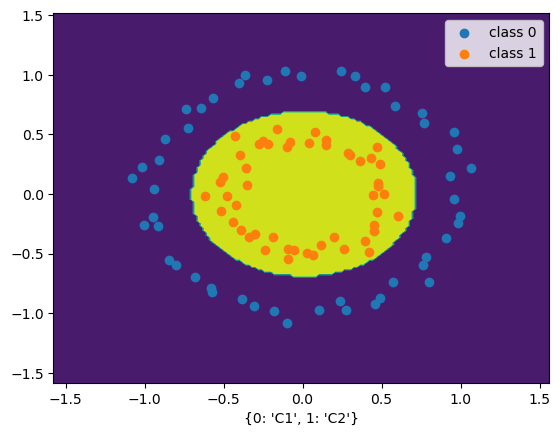

Your code PASSED the code check!


In [69]:
from sklearn.datasets import make_circles

def TEST_GaussianNaiveBayes():
    def nonlinear_data(
        n_samples: int = 100, 
        balance: List = None,
        seed: int = 42
    ) -> List[np.ndarray]:
        X, y = make_circles(random_state=seed, factor=.5, noise=.05)

        return X, y

    X, y = nonlinear_data()
    class_names = {
        0: 'C1',
        1: 'C2',
    }
    gnb = GaussianNaiveBayes()
    gnb.fit(X, y)
    plot_decision_boundary(gnb, X, y, class_names)

    todo_check([
        (np.all(np.isclose(gnb.log_priors, np.array([-0.69314718, -0.69314718]), rtol=.1)), "gnb.log_priors has incorrect values"),
        (np.all(np.isclose(gnb.priors, np.array([0.5, 0.5]), rtol=.1)), "gnb.priors has incorrect values"),
        (np.all(np.isclose(gnb.means.flatten(), np.array([-0.00126599, -0.00426598,  0.00605525,  0.00029719]), rtol=.1)),"gnb.means has incorrect values"),
        (np.all(np.isclose(gnb.probabilities(X)[1], np.array([0.4478195, 0.5521805]), rtol=.01)), "probabilities has incorrect values"),
        (np.all(np.isclose(gnb.predict(X)[:3].flatten(), np.array([1, 1, 1]))), "wrong label predictions were detected.")
    ])
    
TEST_GaussianNaiveBayes()
garbage_collect(['TEST_GaussianNaiveBayes'])

# Multi-class Classification

## Petal length and width

Let's first try solving the iris classification problem again by using the petal features only!

Recall that when we plotted the petal length against the petal width we could see that the versicolor data samples were plotted directly in the middle between the setosa and virginica data samples. Let's see if Gaussian Naive Bayes can correctly separate these three classes.


### Training

#### TODO 15
Complete the TODO by getting our data, training the `GaussianNaiveBayes` class and making predictions for our training and validation data.

1. Call the `data_prep()` function to get the data where we only use the petal length and width features. Store the output into `data`. To do so, pass the arguments corresponding to the following descriptions:
    1. Pass the Iris dataset.
    1. Set the column 'class' to act as the labels/targets.
    1. Return all data as NumPy arrays.
    1. Drop the 'sepal length' and 'sepal width' features.
    1. Return all data as arrays using the `return_array` argument
    
1. Create an instance of the `GaussianNaiveBayes`. Store the output into `gnb`.

In [70]:
""" Splits data and runs data cleaning and transformations.
    
        Args:
            df: A Pandas DataFrame containing our dataset for the 
                current lab.
                
            label_name: Name of the column in the DataFrame store in df 
                which will be used as the label/target. This will be 
                passed to the feature_label_split() function.
            
            seed: The seed used when splitting data into train, 
                validation, and test. This will be passed to the
                train_valid_test_split() function.
            
            return_array: A boolean which when True will return all data as NumPy
                arrays instead of Pandas DataFrames.
            
            drop_features: List of feature names to drop from the passed
                DataFrame stored in df.
    """
# TODO 15.1
#pass the data set, set class as label name, return dat aas numpy array, and drop select columns
data =data_prep(df=iris_df, label_name='class', return_array=True, drop_features=['sepal length', 'sepal width'])

X_trn, y_trn, X_vld, y_vld, _, _, feature_names = data

# TODO 15.2
#call GaussianNaiveBayes method
gnb = GaussianNaiveBayes()

gnb.fit(X_trn, y_trn)
y_hat_trn = gnb.predict(X_trn)

todo_check([
    (np.all(np.isclose(X_trn[4].flatten(), [0.97932518, 1.17336698])), "X_trn has wrong values"),
    (np.sum(y_hat_trn != y_trn) == 5, "y_hat_trn has the wrong number of isclassified samples"),
    (np.all(np.isclose(gnb.means[1], np.array([0.26178115, 0.14178753]))), "gnb.means has incorrect values"),
    (np.all(np.isclose(gnb.priors, np.array([0.33333333, 0.3125    , 0.35416667]))), "gnb.priors has incorrect values")
])

Your code PASSED the code check!


Below we can see the probabilities for each of the iris flower classes given the training data.

In [71]:
trn_probs = gnb.probabilities(X_trn)
trn_probs_df = pd.DataFrame(trn_probs, columns=iris.target_names)
trn_probs_df

,setosa,versicolor,virginica
0,0.221206,0.256328,0.522466
1,0.167223,0.600632,0.232145
2,0.240729,0.503474,0.255797
3,0.856897,0.067080,0.076024
4,0.153205,0.143666,0.703129
...,...,...,...
91,0.195651,0.183448,0.620901
92,0.930577,0.032542,0.036881
93,0.129872,0.723326,0.146802
94,0.928785,0.033382,0.037833


Next, since we are using 2 features, we can visualize the boundaries between the classes. Here is how you read the below plot:

- The **purple** shaded region corresponds to all the possible values for petal length and width that would be predicted to be setosa.
- The **turquoise** shaded region corresponds to all the possible values for petal length and width that would be predicted to be versicolor. 
- The **yellow** shaded region corresponds to all the possible values for petal length and width that would be predicted to be virginica. 

Notice, as the Gaussian Naive Bayes does a good job at separating all the classes even when they are overlapping with each other.

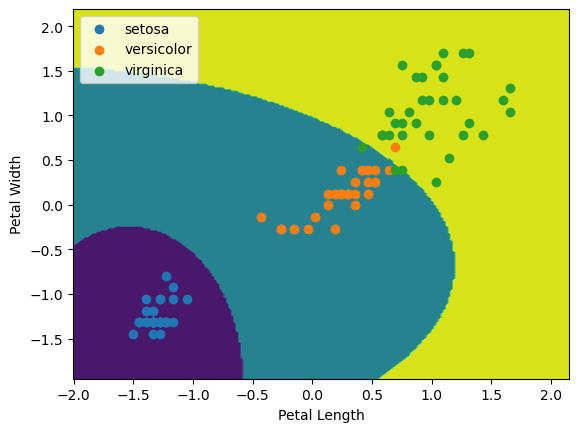

In [72]:
class_names = {
    0: 'setosa',
    1: 'versicolor',
    2: 'virginica'
}

plot_decision_boundary(
    gnb, X_trn, y_trn, 
    xlabel='Petal Length', 
    ylabel='Petal Width',
    class_names=class_names
);

Let's now observe our classification metrics. Below we can see the accuracy is pretty high. We only missed 4 data samples! These missed data samples are most likely versicolor and virginica since these two classes overlap.

In [73]:
trn_acc = accuracy(y_hat=y_hat_trn, y=y_trn)
print(f"Training accuracy: {trn_acc}")

Accuracy ratio: 91/96
Training accuracy: 0.9479166666666666


Next, let's breakdown the predictions using the confusion matrix. Notice, the confusion matrix is a 3x3! This is because we have 3 classes! A confusion matrix will always be a square matrix whose dimensions equal the number of classes in your data.


How do we read this new 3x3 confusion matrix? Recall, the rows correspond to the actual classes and the columns correspond to the predicted classes. Thus, we can read the below confusion matrix as follows:

- Setosa had 32 correct predictions
- Versicolor had 28 correct predictions
- Versicolor had 2 samples that were predicted to be virginica
- Virginica had 31 correct predictions 
- Virginica had 3 samples that were predicted to be versicolor


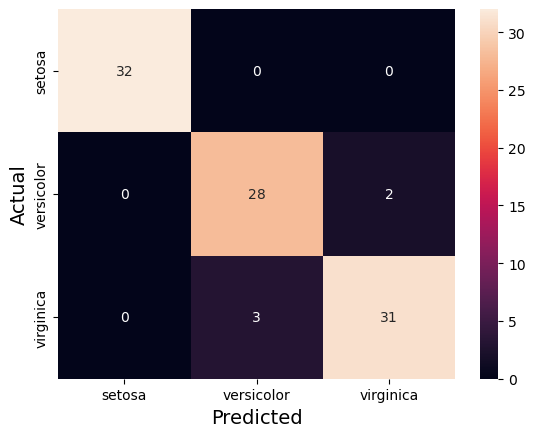

In [74]:
plot_confusion_matrix(
    y_hat=y_hat_trn, 
    y=y_trn,
    class_names=class_names
);

Now let's compute our PPV, TPR, and TNR scores. However, recall we need to compute the true positives, false positives, false negatives, and true negatives. How do we do this for a multi-class classification problem?

We can do so using the below picture we saw earlier. The goal is to treat the confusion matrix as a one-vs-all problem. Here we can see the true positives are on the main diagonal. The false positives correspond to the  column of the current true positive class and the false negatives correspond to the row of the current true positive class. Everything else is then considered to be a turn negative.

<img src="https://i.stack.imgur.com/AuTKP.png" width=300 height=300>


For more information on how to compute the true positives, false positives, false negatives, and true negatives for multi-class classifications problems see this [post](https://stackoverflow.com/questions/31324218/scikit-learn-how-to-obtain-true-positive-true-negative-false-positive-and-fal).

With these ideas in mind, the `compute_scores()` function was updated to work for multi-class classification problems. Feel free to go back and review the code. Notice in the below output we get a PPV, TPR, and TRN score for each class where each class is framed from the one-vs-all perspective.

We can see that seotsa has 100% on all the scores but the veriscolor and virginica scores are lower due to misclassifications.

In [75]:
compute_scores(
    y_hat=y_hat_trn, 
    y=y_trn, 
    class_names=class_names
);

Scores for class setosa
	PPV ratio tp/(tp+fp): 32/32
	PPV (precision): 1.0

	TPR ratio tp/(tp+fn): 32/32
	TPR (recall/sensitivity): 1.0

	TNR ratio tn/(tn+fp): 64/64
	TNR (specificity): 1.0
Scores for class versicolor
	PPV ratio tp/(tp+fp): 28/31
	PPV (precision): 0.9032258064516129

	TPR ratio tp/(tp+fn): 28/30
	TPR (recall/sensitivity): 0.9333333333333333

	TNR ratio tn/(tn+fp): 63/66
	TNR (specificity): 0.9545454545454546
Scores for class virginica
	PPV ratio tp/(tp+fp): 31/33
	PPV (precision): 0.9393939393939394

	TPR ratio tp/(tp+fn): 31/34
	TPR (recall/sensitivity): 0.9117647058823529

	TNR ratio tn/(tn+fp): 60/62
	TNR (specificity): 0.967741935483871


### Validating

Below we compute the predictions and metrics for all the validation data.

In [76]:
y_hat_vld = gnb.predict(X_vld)

In [77]:
vld_probs = gnb.probabilities(X_vld)
vld_probs_df = pd.DataFrame(vld_probs, columns=iris.target_names)
vld_probs_df

,setosa,versicolor,virginica
0,0.207930,0.571052,0.221018
1,0.118018,0.755764,0.126218
2,0.904708,0.044668,0.050624
3,0.930577,0.032542,0.036881
4,0.928785,0.033382,0.037833
5,0.226723,0.212553,0.560724
6,0.192156,0.505525,0.302319
7,0.176912,0.170830,0.652257
8,0.184756,0.174915,0.640329
9,0.168375,0.159599,0.672026


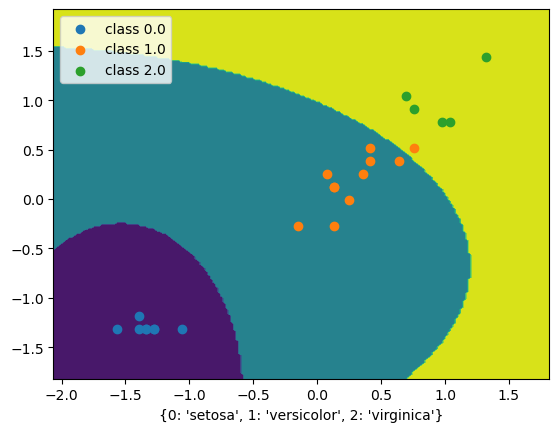

In [78]:
plot_decision_boundary(gnb, X_vld, y_vld, class_names)

So far we can see the validation scores and visualizations look good. As we can see below, the validation accuracy is 95% and we only misclassified one sample.

In [79]:
vld_acc = accuracy(y_hat=y_hat_vld, y=y_vld)
print(f"Validation accuracy: {vld_acc}")

Accuracy ratio: 23/24
Validation accuracy: 0.9583333333333334


We can read the below confusion matrix as follows:

- Setosa had 8 correct predictions
- Versicolor had 10 correct predictions
- Versicolor had 1 sample that was predicted to be virginica
- Virginica had 5 correct predictions 

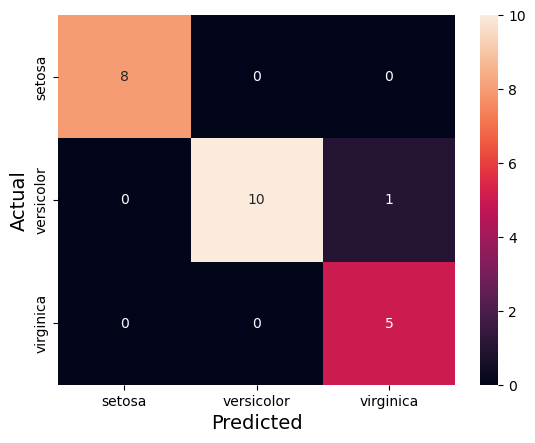

In [80]:
plot_confusion_matrix(
    y_hat=y_hat_vld, 
    y=y_vld,
    class_names=class_names);

Let's quickly see what the probability was for the 1 misclassified virginica sample. We can do so by indexing the `vld_probs_df` by a boolean array where every True element indicates `y_hat_vld` did not equal `y_vld`.

As we can see, our model predicted a 47% chance that the misclassified sample was virginica while only 30% chance that it was the true class versicolor.

In [81]:
prob_of_misclassified = vld_probs_df[y_hat_vld != y_vld]
prob_of_misclassified

,setosa,versicolor,virginica
11,0.213019,0.314909,0.472072


In [82]:
compute_scores(
    y_hat=y_hat_vld, 
    y=y_vld, 
    class_names=class_names
);

Scores for class setosa
	PPV ratio tp/(tp+fp): 8/8
	PPV (precision): 1.0

	TPR ratio tp/(tp+fn): 8/8
	TPR (recall/sensitivity): 1.0

	TNR ratio tn/(tn+fp): 16/16
	TNR (specificity): 1.0
Scores for class versicolor
	PPV ratio tp/(tp+fp): 10/10
	PPV (precision): 1.0

	TPR ratio tp/(tp+fn): 10/11
	TPR (recall/sensitivity): 0.9090909090909091

	TNR ratio tn/(tn+fp): 13/13
	TNR (specificity): 1.0
Scores for class virginica
	PPV ratio tp/(tp+fp): 5/6
	PPV (precision): 0.8333333333333334

	TPR ratio tp/(tp+fn): 5/5
	TPR (recall/sensitivity): 1.0

	TNR ratio tn/(tn+fp): 18/19
	TNR (specificity): 0.9473684210526315


In [83]:
# Remove data variables for this section from memory
garbage_collect(['gnb', 'X_trn', 'y_trn', 'X_vld', 'y_vld','y_hat_trn', 'trn_acc', 'y_hat_vld', 'vld_acc', 'prob_of_misclassified', 'data', 'feature_names', 'trn_probs', 'trn_probs_df', 'vld_probs', 'vld_probs_df'])

## All Features

Now, let's see what happens when we use 4 dimensions. To do so, we'll use both the petal and sepal features.

### Training

#### TODO 16
Complete the TODO by getting our data, training the `GaussianNaiveBayes` class and making predictions for our training and validation data.

1. Call the `data_prep()` function to get the data containing ALL features. Store the ouput into `data`. To do so, pass the arguments corresponding to the following descriptions:
    1. Pass the Iris dataset.
    1. Set the column 'class' to act as the labels/targets.
    1. Return all data as NumPy arrays.
    1. Return all data as arrays using the `return_array` argument
 
 
2. Create an instance of the `GaussianNaiveBayes`. Store the output into `gnb`.

In [84]:
""" Splits data and runs data cleaning and transformations.
    
        Args:
            df: A Pandas DataFrame containing our dataset for the 
                current lab.
                
            label_name: Name of the column in the DataFrame store in df 
                which will be used as the label/target. This will be 
                passed to the feature_label_split() function.
            
            seed: The seed used when splitting data into train, 
                validation, and test. This will be passed to the
                train_valid_test_split() function.
            
            return_array: A boolean which when True will return all data as NumPy
                arrays instead of Pandas DataFrames.
            
            drop_features: List of feature names to drop from the passed
                DataFrame stored in df.
    """
# TODO 16.1
#pass the data set, set class as label name, and return data as numpy array
data =  data_prep(df=iris_df, label_name='class', return_array=True)
X_trn, y_trn, X_vld, y_vld, _, _, feature_names = data

# TODO 16.2
#call GaussianNaiveBayes method
gnb = GaussianNaiveBayes()

gnb.fit(X_trn, y_trn)
y_hat_trn = gnb.predict(X_trn)

todo_check([
    (np.all(np.isclose(X_trn[4].flatten(), [1.1353636 , -0.23717928,  0.97932518,  1.17336698], rtol=.01)), "X_trn has incorrect values"),
    (np.all(np.isclose(gnb.means[1], np.array([ 0.11239465, -0.7014059 ,  0.26178115,  0.14178753]), rtol=.01)), "gnb.means has incorrect values"),
    (np.all(np.isclose(gnb.priors, np.array([0.33333333, 0.3125    , 0.35416667]), rtol=.01)), "gnb.priors has incorrect values"),
    (np.sum(y_hat_trn != y_trn) == 6, "wrong number of misclassified samples detected!")
])

Your code PASSED the code check!


In [85]:
trn_probs = gnb.probabilities(X_trn)
trn_probs_df = pd.DataFrame(trn_probs, columns=iris.target_names)
trn_probs_df

,setosa,versicolor,virginica
0,0.302171,0.300671,0.397158
1,0.301279,0.353216,0.345505
2,0.319943,0.340117,0.339940
3,0.663994,0.157503,0.178503
4,0.255017,0.239084,0.505899
...,...,...,...
91,0.311512,0.292043,0.396444
92,0.792663,0.097189,0.110148
93,0.263447,0.451798,0.284754
94,0.838126,0.075878,0.085995


In [86]:
trn_acc = accuracy(y_hat=y_hat_trn, y=y_trn)
print(f"Training accuracy: {trn_acc}")

Accuracy ratio: 90/96
Training accuracy: 0.9375


We can read the below confusion matrix as follows:

- Setosa had 32 correct predictions
- Versicolor had 27 correct predictions
- Versicolor had 3 samples that were predicted to be virginica
- Virginica had 31 correct predictions 
- Virginica had 3 samples that were predicted to be versicolor


Notice, the model performed worse as it missed 1 extra virginica data samples this time!

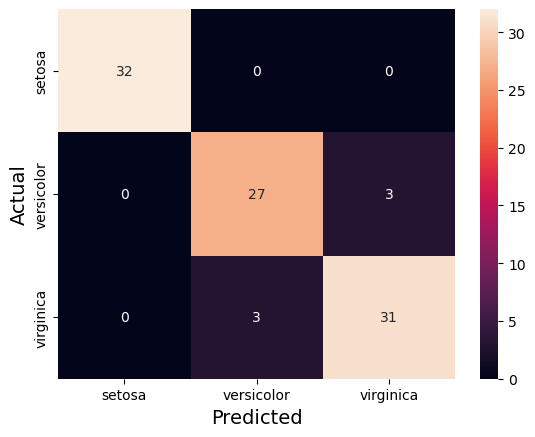

In [87]:
plot_confusion_matrix(
    y_hat=y_hat_trn, 
    y=y_trn,
    class_names=class_names
);

In [88]:
compute_scores(
    y_hat=y_hat_trn, 
    y=y_trn, 
    class_names=class_names
);

Scores for class setosa
	PPV ratio tp/(tp+fp): 32/32
	PPV (precision): 1.0

	TPR ratio tp/(tp+fn): 32/32
	TPR (recall/sensitivity): 1.0

	TNR ratio tn/(tn+fp): 64/64
	TNR (specificity): 1.0
Scores for class versicolor
	PPV ratio tp/(tp+fp): 27/30
	PPV (precision): 0.9

	TPR ratio tp/(tp+fn): 27/30
	TPR (recall/sensitivity): 0.9

	TNR ratio tn/(tn+fp): 63/66
	TNR (specificity): 0.9545454545454546
Scores for class virginica
	PPV ratio tp/(tp+fp): 31/34
	PPV (precision): 0.9117647058823529

	TPR ratio tp/(tp+fn): 31/34
	TPR (recall/sensitivity): 0.9117647058823529

	TNR ratio tn/(tn+fp): 59/62
	TNR (specificity): 0.9516129032258065


### Validating

Below we can see that using all features doesn't affect our validation scores.

In [89]:
y_hat_vld = gnb.predict(X_vld)

In [90]:
vld_probs = gnb.probabilities(X_vld)
vld_probs_df = pd.DataFrame(vld_probs, columns=iris.target_names)
vld_probs_df

,setosa,versicolor,virginica
0,0.322880,0.334058,0.343062
1,0.296141,0.389193,0.314666
2,0.500087,0.234334,0.265579
3,0.759294,0.112831,0.127875
4,0.846055,0.072162,0.081783
5,0.324699,0.304405,0.370896
6,0.298853,0.370494,0.330653
7,0.306746,0.290183,0.403071
8,0.323233,0.303603,0.373164
9,0.267498,0.251499,0.481003


In [91]:
vld_acc = accuracy(y_hat=y_hat_vld, y=y_vld)
print(f"Validation accuracy: {vld_acc}")

Accuracy ratio: 23/24
Validation accuracy: 0.9583333333333334


We can read the below confusion matrix as follows:

- Setosa had 8 correct predictions
- Versicolor had 10 correct predictions
- Versicolor had 1 sample that was predicted to be virginica
- Virginica had 5 correct predictions 

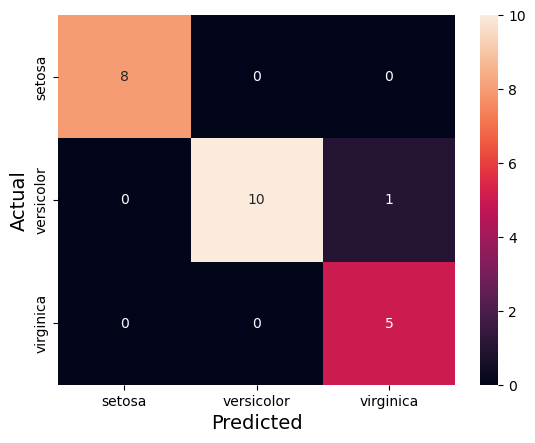

In [92]:
plot_confusion_matrix(
    y_hat=y_hat_vld, 
    y=y_vld,
    class_names=class_names
);

While the results are the same, we can see our model decreased the chance that the misclassified sample belonged to the virginica class and increased the probability that it belonged to the correct class versicolor. However, it wasn't enough to correctly classify the data sample!

In [93]:
prob_of_misclassified = vld_probs_df[y_hat_vld != y_vld]
prob_of_misclassified

,setosa,versicolor,virginica
11,0.301066,0.33328,0.365654


In [94]:
compute_scores(
    y_hat=y_hat_vld, 
    y=y_vld, 
    class_names=class_names
);

Scores for class setosa
	PPV ratio tp/(tp+fp): 8/8
	PPV (precision): 1.0

	TPR ratio tp/(tp+fn): 8/8
	TPR (recall/sensitivity): 1.0

	TNR ratio tn/(tn+fp): 16/16
	TNR (specificity): 1.0
Scores for class versicolor
	PPV ratio tp/(tp+fp): 10/10
	PPV (precision): 1.0

	TPR ratio tp/(tp+fn): 10/11
	TPR (recall/sensitivity): 0.9090909090909091

	TNR ratio tn/(tn+fp): 13/13
	TNR (specificity): 1.0
Scores for class virginica
	PPV ratio tp/(tp+fp): 5/6
	PPV (precision): 0.8333333333333334

	TPR ratio tp/(tp+fn): 5/5
	TPR (recall/sensitivity): 1.0

	TNR ratio tn/(tn+fp): 18/19
	TNR (specificity): 0.9473684210526315


In [95]:
# Remove data variables for this section from memory
garbage_collect(['gnb', 'X_trn', 'y_trn', 'X_vld', 'y_vld','y_hat_trn', 'trn_acc', 'y_hat_vld', 'vld_acc', 'prob_of_misclassified', 'data', 'feature_names', 'trn_probs', 'trn_probs_df', 'vld_probs', 'vld_probs_df'])